In this notebook we implement the methods described in our notes on linear regression using python. For demonstration we are using a dataset representing the number of hours studied vs score, for a small group. Our aim is to estimate our test score given the number of hours we study.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('../data/test_scores.csv')
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Text(0, 0.5, 'y (Target) : Scores')

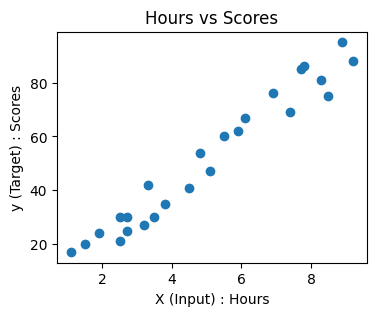

In [10]:
'''
Taking the Hours and Scores columns as X and y 
and coverting them to numpy arrays.
'''

X = np.array(df['Hours']).reshape(-1,1)
y = np.array(df['Scores'])

# Plotting the data X(Hours) on x-axis and y(Scores) on y-axis
plt.figure(figsize=(4,3)) # figure size
plt.scatter(X, y)
plt.title('Hours vs Scores')
plt.xlabel('X (Input) : Hours')
plt.ylabel('y (Target) : Scores')

Here we need to define our hypothesis, in this case we assume a straight line: 
$h(x) = wX + b$

Where $w = weights, b = bias$
In our code we will refer to $h(x)$ as **y_h**

For our example we can represent the data in 2-dimensions, weights is the gradient and bias is the y-intercept. If we had two features in our data instead of just one, we would represent the data in 3-dimensions and would require a plane to fit the data in 3-D space. So our hypothesis will be a plane rather than a straight line. As the number of features increases, the dimensions of our weights and bias increase.

Some notation to keep in mind:
$n$ → number of features (1 in our example, Hours)

$m$ → number of training examples (25 in our example)

$X$ → Features, a matrix of size (m, n); rows represent the training examples and columns represent the features.

$y$ → labels/target, a matrix of size (m, 1); each row is a label for the corresponding set of features in X.

$(X(i), y(i))$ → $ith$ example in the Training set

### Loss function
The next question is how to $w$ and $b$ such $h(x)$ is as close to $y$ as possible. This is where Loss Function comes in, defined as mean squared error. Since we are applying linear regression we can simplify our equation from the notes to: $L = 1/2m \sum\limits_{i=1}^m(\hat{y}-y)^2$

Before we build our model, to summarise the steps required:



In [ ]:
# Before we build our model, to summarise the steps required:

# 1. Seperate the data as X (features) and y (lables), and initialize the parameters randomly or to all zeros
weights = np.zeros((n,1))  # n: number of features
bias = 0

# 2. Calculate y_hat 
y_hat = np.dot(X, weights) + bias

# 3. Calculate gradients of loss with respect to parameters (weights and bias)
dw = (1/m)*np.dot(X.T, (y_hat - y))
db = (1/m)*np.sum((y_hat - y))

# 4. Update the parameters
weights -= lr*dw
bias -= lr*db

# 5. Repeat the above points. 
# The number of times you repeat is the number of steps you take downhill. 
# Also called epochs (or the number of iterations).

In [13]:
# Linear Regression class
class LinReg:
    '''
    Initializing lr: learning rate, epochs: no. of iterations, 
    weights & bias: parameters as None
    default lr: 0.01, epochs: 800
    '''
    def __init__(self, lr=0.01, epochs=800):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None
    # Training function: fit
    def fit(self, X, y):
        # shape of X: (number of training examples: m, number of    
        # features: n)
        m, n = X.shape    
    
        # Initializing weights as a matrix of zeros of size: (number
        # of features: n, 1) and bias as 0
        self.weights = np.zeros((n,1))
        self.bias = 0
        
        # reshaping y as (m,1) in case your dataset initialized as 
        # (m,) which can cause problems
        y = y.reshape(m,1)
        
        # empty lsit to store losses so we can plot them later 
        # against epochs
        losses = []
        
        # Gradient Descent loop/ Training loop
        for epoch in range(self.epochs):
        
            # Calculating prediction: y_hat or h(x)
            y_hat = np.dot(X, self.weights) + self.bias
     
            # Calculting loss
            loss = np.mean((y_hat - y)**2)
    
            # Appending loss in list: losses
            losses.append(loss)
    
            # Calculating derivatives of parameters(weights, and 
            # bias) 
            dw = (1/m)*np.dot(X.T, (y_hat - y))
            db = (1/m)*np.sum((y_hat - y))
   # Updating the parameters: parameter := parameter - lr*derivative
   # of loss/cost w.r.t parameter)
            self.weights -= self.lr*dw
            self.bias -= self.lr*db
        
        # returning the parameter so we can look at them later
        return self.weights, self.bias, losses
    # Predicting(calculating y_hat with our updated weights) for the 
    # testing/validation     
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

##### Testing LinReg on our dataset 

Text(0, 0.5, 'y (Target) : Scores')

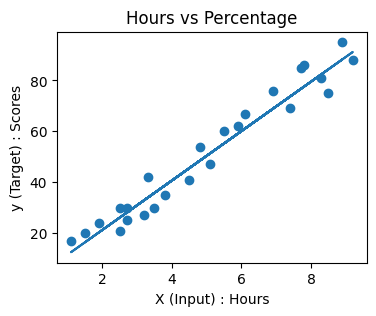

In [16]:
# Training
X_train, X_test, y_train, y_test = X[:20], X[20:], y[:20], y[20:]
model = LinReg(epochs=100)
w, b, l = model.fit(X_train,y_train)

# Plotting
fig = plt.figure(figsize=(4,3))
plt.scatter(X, y)
plt.plot(X, model.predict(X))  # X and predictions.
plt.title('Hours vs Percentage')
plt.xlabel('X (Input) : Hours')
plt.ylabel('y (Target) : Scores')

In [15]:
# Predicting
X_test_preds = model.predict(X_test)
X_test_preds

array([[28.05316177],
       [48.44669117],
       [38.73548669],
       [68.84022056],
       [77.58030459]])

In [33]:
# cleaning up 
X_test_preds = [val for sublist in X_test_preds.tolist() for val in sublist]

[28.053161769029384,
 48.44669116666518,
 38.735486691600514,
 68.840220564301,
 77.5803045918592]

In [34]:
# Comparing true values to our predictions.
Compare_df = pd.DataFrame({'Actual': y_test, 'Predicted': X_test_preds})
Compare_df

,Actual,Predicted
0,30,28.053162
1,54,48.446691
2,35,38.735487
3,76,68.840221
4,86,77.580305


Text(0, 0.5, 'Loss / Cost')

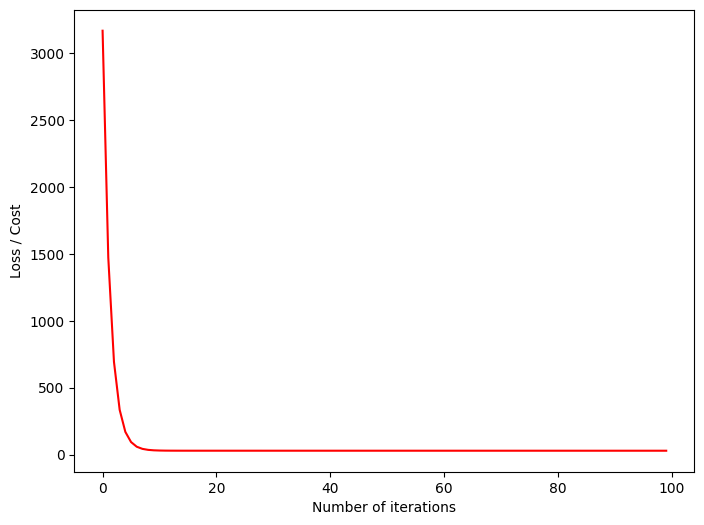

In [19]:
#  Loss vs epochs 
fig = plt.figure(figsize=(8,6))
plt.plot([i for i in range(100)], l, 'r-')
plt.xlabel('Number of iterations')
plt.ylabel('Loss / Cost')

#### sklearn implementation
In practice we do not need to build a LinReg class from scratch, sklearn provides models off the shelf

In [39]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


reg = linear_model.LinearRegression()

# Train the model using the training sets
reg.fit(X_train, y_train)

# Make predictions using the testing set
sk_y_pred = reg.predict(X_test)

# The coefficients
print("Coefficients: ", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, sk_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, sk_y_pred))

Coefficients:  [9.52038609]
Mean squared error: 35.18
Coefficient of determination: 0.93


In [40]:
Compare_df = pd.DataFrame({'Actual': y_test, 'Predicted': sk_y_pred})
Compare_df

,Actual,Predicted
0,30,28.736325
1,54,48.729136
2,35,39.208750
3,76,68.721947
4,86,77.290295
